In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
shapiro_test = stats.shapiro(df['Glucose'])


In [5]:
print("Shapiro wilk p value : " ,shapiro_test.pvalue)

Shapiro wilk p value :  1.9863474999979633e-11


In [6]:
if shapiro_test.pvalue <0.05:
    print("No normal distribution")
else:
    print("Data may be normally distributed but the qq plot can provide further insights")

No normal distribution


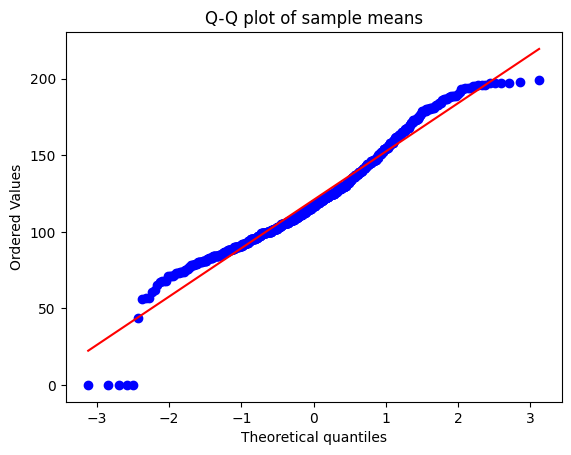

In [7]:
stats.probplot(df['Glucose'],dist='norm',plot=plt)
plt.title("Q-Q plot of sample means")
plt.show()

In [8]:
sample_means=[]
n_samples = 100
sample_size = 30

In [9]:
for i in range(n_samples):
    sample = df['Glucose'].sample(n=sample_size,replace=True)
    sample_means.append(sample.mean())

Text(0, 0.5, 'Frequency')

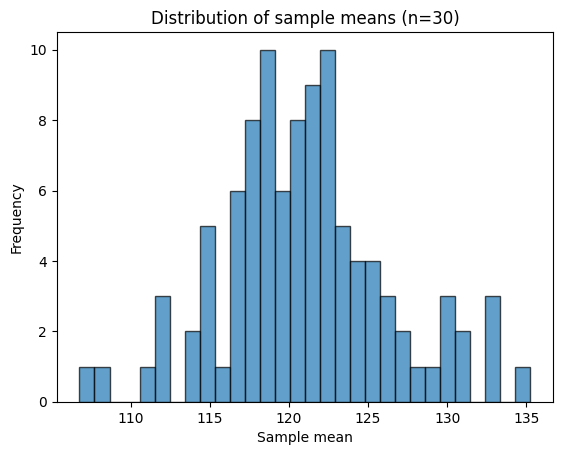

In [10]:
plt.hist(sample_means,bins=30,edgecolor='k',alpha=0.7)
plt.title("Distribution of sample means (n=30)")
plt.xlabel("Sample mean")
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Q Q plot of sample means')

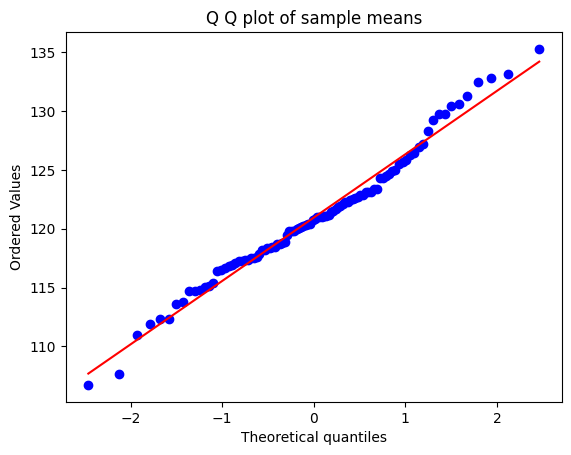

In [11]:
stats.probplot(sample_means,dist='norm',plot=plt)
plt.title("Q Q plot of sample means")

In [12]:
shapiro_test = stats.shapiro(sample_means)
print("shapiro wilk p value :",shapiro_test.pvalue)

shapiro wilk p value : 0.2455375836131996


In [13]:
if shapiro_test.pvalue <0.05:
    print("No normal distribution")
else:
    print("Data may be normally distributed but the qq plot can provide further insights")

Data may be normally distributed but the qq plot can provide further insights
